<h1 style="text-align:center; font-size:24px;">Name:Rohan Nachane</h1>

<h2 style="text-align:center; font-size:25px; color:blue;"><b>Practical 04-Logistic Regression</b></h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("Diabetes.csv")

In [3]:
df.drop(['Pregnancies','BloodPressure','SkinThickness'],axis=1,inplace=True)

In [4]:
df

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,0,33.6,0.627,50,1
1,85,0,26.6,0.351,31,0
2,183,0,23.3,0.672,32,1
3,89,94,28.1,0.167,21,0
4,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...
763,101,180,32.9,0.171,63,0
764,122,0,36.8,0.340,27,0
765,121,112,26.2,0.245,30,0
766,126,0,30.1,0.349,47,1


In [5]:
columns_to_replace = df.columns[df.columns != 'Outcome']
df[columns_to_replace] = df[columns_to_replace].replace(0, df[columns_to_replace].mean())

In [6]:
#df[columns_to_replace]

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
X

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,79.799479,33.6,0.627,50
1,85.0,79.799479,26.6,0.351,31
2,183.0,79.799479,23.3,0.672,32
3,89.0,94.000000,28.1,0.167,21
4,137.0,168.000000,43.1,2.288,33
...,...,...,...,...,...
763,101.0,180.000000,32.9,0.171,63
764,122.0,79.799479,36.8,0.340,27
765,121.0,112.000000,26.2,0.245,30
766,126.0,79.799479,30.1,0.349,47


In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
#X_train

In [13]:
#X_test

In [14]:
#y_train

In [15]:
#y_test

In [16]:
#y

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[-1.25806262, -0.41602705, -0.05130551, -0.49073479, -1.03594038],
       [-0.32713796, -0.41602705, -0.5985773 ,  2.41502991,  1.48710085],
       [ 0.57053938, -0.38217149, -0.52642693,  0.54916055, -0.94893896],
       ...,
       [-0.69285836, -0.41602705,  1.91225539,  1.981245  ,  0.44308379],
       [ 0.637034  , -0.41602705,  1.45049306, -0.78487662, -0.33992901],
       [ 0.10507706, -0.41602705, -1.42109145, -0.61552223, -1.03594038]])

In [21]:
#X_test_scaled

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test_scaled)

In [26]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [27]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

     Actual  Predicted
668       0          0
324       0          0
624       0          0
690       0          0
473       0          1
..      ...        ...
355       1          1
534       0          0
344       0          0
296       1          0
462       0          0

[154 rows x 2 columns]


In [28]:
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
import seaborn as sns

In [31]:
cm = confusion_matrix(y_test, y_pred)

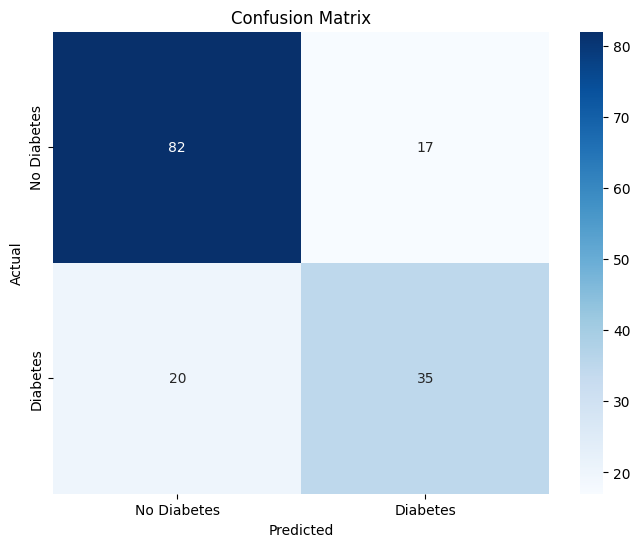

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [35]:
print("\nModel Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Model Performance:
Accuracy: 0.7597402597402597
Precision: 0.6730769230769231
Recall: 0.6363636363636364
F1-score: 0.6542056074766355
